<a href="https://colab.research.google.com/github/Armifara/Deep-Learning/blob/main/1_Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

We Use Google Collab, Due to highly intensive GPU
- On the local network, like Laptop, it’s quite slow

To change from CPU (default) to GPU,
1. Go to Runtime
2. Change Runtime Type
3. Select T4 GPU

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

Raw data can directly be input, by the url

# Step 1 - Data Ingestion

In [ ]:
# Train Data
url_train = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv'
print (url_train)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


In [ ]:
import pandas as pd
df = pd.read_csv(url_train)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Feature Names
1. AT - Atmospheric Temparature in degree Celcius
2. V - Vaccuum Pressure in Pascals
3. AP - Atmospheric Pressure in Pascals
4. RH - Relative Humidity in %
5. PE - Power Output of the Plant in MW (Target Feature)

# Step 2 - Data Quality Checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.shape

(9568, 5)

In [ ]:
# Missing Values
m = df.isna().sum()
m

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
df.duplicated().sum()

np.int64(41)

In [ ]:
# Dropping the Duplicates
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.shape

(9527, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Separate X & Y (Target Feature --> **PE**)

In [ ]:
X = df.drop(columns=["PE"])
Y = df["PE"]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Preprocessing on X

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
dtypes: float64(4)
memory usage: 297.8 KB


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

# Step 5 - Train Test Split

In [38]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42
)

In [39]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [40]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [41]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [42]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [43]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((7621, 4), (1906, 4), (7621,), (1906,))

# Step 6 - Build the Neural Network
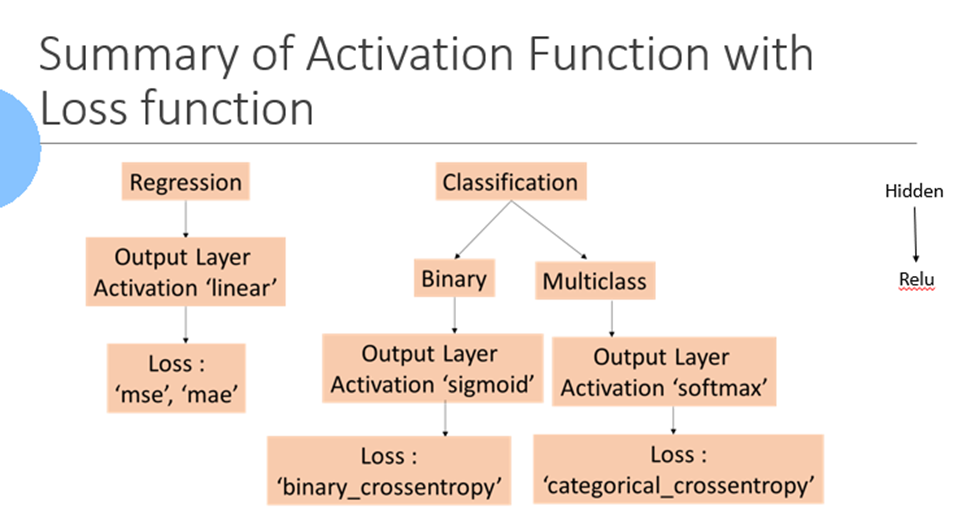

In [44]:
# To check, the number of rows and columns,
# 0 --> Rows, 1 --> Columns
xtrain.shape[1]
# The number of Columns --> number of layers

4

In [45]:
# Sequential --> You define everything layer by layer, like input layer has so many neurons, hidden layer has so many and so on
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
# Dense --> Each and Every Neuron is connected and interconnected with each other

In [46]:
# units --> neurons
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        # Output Layer --> Activation is important since its different for Regression and Classification
        # Output in this dataset is PE, so units will be 1
        Dense(units=1, activation="linear")
    ]
)

In [47]:
# In Summary, Input Layer is not available, so it starts from the first Hidden Layer
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
# After Building the Model, it has to be compiled as well
model.compile(
    # Best Optimizer is adam, can be used for all models
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

In [49]:
# Fit the model
history = model.fit(xtrain, ytrain, validation_split=0.1, epochs=60)

Epoch 1/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 205586.3906 - mae: 453.1378 - val_loss: 201789.5000 - val_mae: 448.9406
Epoch 2/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 200046.6406 - mae: 446.9942 - val_loss: 189195.8281 - val_mae: 434.6662
Epoch 3/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 183734.5000 - mae: 428.2340 - val_loss: 159031.0156 - val_mae: 397.9598
Epoch 4/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 149528.1406 - mae: 385.2952 - val_loss: 113191.8047 - val_mae: 332.8947
Epoch 5/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 101642.4297 - mae: 313.6361 - val_loss: 67521.5781 - val_mae: 247.5032
Epoch 6/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59482.2227 - mae: 229.1118 - val_loss: 37577.0078 - val_mae: 171.4620
Epoch 7/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32838.4805 - mae: 159.0793 - val_loss: 24305.5469 - val_mae: 134.5676
Epoch 8/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21768.5352 - mae: 127

In [50]:
# How the loss is changing over the 60 iterations
history.history['loss']

[204889.3125,
 197259.921875,
 176462.875,
 137649.640625,
 90193.375,
 51046.75,
 29238.14453125,
 20171.458984375,
 16052.3671875,
 13303.7724609375,
 10997.953125,
 8937.9482421875,
 7111.396484375,
 5515.05224609375,
 4157.40087890625,
 3052.527587890625,
 2215.938720703125,
 1618.667236328125,
 1196.0189208984375,
 898.5474853515625,
 683.1708984375,
 512.49658203125,
 379.5489807128906,
 288.4488830566406,
 226.25909423828125,
 182.36441040039062,
 150.58287048339844,
 126.55670166015625,
 107.57267761230469,
 92.137939453125,
 79.80747985839844,
 69.45921325683594,
 61.0009880065918,
 53.90459442138672,
 47.92155456542969,
 42.88795852661133,
 38.996376037597656,
 35.50260543823242,
 32.602020263671875,
 30.401771545410156,
 28.485925674438477,
 26.908794403076172,
 25.73678970336914,
 24.718050003051758,
 23.827714920043945,
 23.358928680419922,
 22.790979385375977,
 22.260562896728516,
 21.8041934967041,
 21.47718620300293,
 21.29753303527832,
 21.17194938659668,
 20.877435684

In [51]:
# How the validation loss is changing over the 60 iterations
history.history['val_loss']

[201789.5,
 189195.828125,
 159031.015625,
 113191.8046875,
 67521.578125,
 37577.0078125,
 24305.546875,
 18918.62109375,
 15730.1787109375,
 13133.9775390625,
 10788.28515625,
 8652.8212890625,
 6751.89990234375,
 5119.00244140625,
 3777.1474609375,
 2715.1044921875,
 1947.1207275390625,
 1410.7872314453125,
 1036.0201416015625,
 781.8246459960938,
 588.3556518554688,
 430.19024658203125,
 316.8769836425781,
 240.8469696044922,
 189.43711853027344,
 153.88560485839844,
 127.23797607421875,
 107.05851745605469,
 92.79077911376953,
 79.4468765258789,
 69.52376556396484,
 60.59103012084961,
 52.88290786743164,
 47.85247802734375,
 42.26401138305664,
 37.412410736083984,
 34.157901763916016,
 31.14573097229004,
 29.437602996826172,
 27.929553985595703,
 25.34184455871582,
 24.848844528198242,
 24.02638053894043,
 22.580978393554688,
 22.951261520385742,
 21.456127166748047,
 20.7650146484375,
 20.100229263305664,
 20.39815330505371,
 20.299043655395508,
 20.862091064453125,
 19.612163543

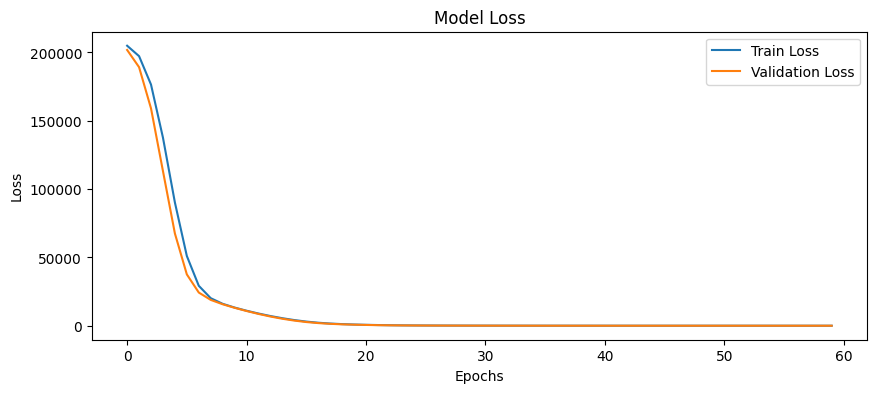

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

# Step 7 - Model Weights

In [53]:
weights = model.get_weights()
weights
# First is Weights, then Bias

[array([[ 0.9349759 ,  0.71713334, -0.8028081 ,  0.5172485 , -0.346613  ,
         -0.8013784 , -0.05398683, -1.1800498 ],
        [ 1.0807717 ,  0.6164652 , -1.0747212 ,  0.6655996 ,  0.6158646 ,
         -1.2937373 ,  0.17643937, -1.1515828 ],
        [ 0.04687166, -0.5050702 ,  0.23715869, -0.12513228,  1.0117232 ,
          0.00367341, -0.8101052 ,  0.07417071],
        [ 0.0420924 , -0.03746298, -0.3487806 ,  1.2927979 , -0.42927527,
         -0.09018776, -1.096116  ,  0.67363495]], dtype=float32),
 array([3.4097764, 3.5495253, 3.5817587, 3.6070685, 3.4173129, 3.5815675,
        3.6685908, 3.3993587], dtype=float32),
 array([[ 0.2621416 ,  2.4077117 ,  1.981681  ,  0.57872117],
        [ 0.33078134,  2.6536252 ,  2.0370216 ,  0.3634848 ],
        [-0.819583  ,  1.74077   ,  3.058745  , -1.4922167 ],
        [-1.2049696 ,  2.2280447 ,  2.7153873 , -1.7755382 ],
        [ 0.5773774 ,  2.7932353 ,  2.456449  ,  0.5557055 ],
        [-1.9113594 ,  2.4515333 ,  2.39193   , -1.5940506 ]

# Step 8 - Model Evaluation

In [57]:
train_mse, train_mae = model.evaluate(xtrain, ytrain)
print(f"Train MSE : {train_mse:.2f}")
print(f"Train MAE : {train_mae:.2f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19.8656 - mae: 3.5295
Train MSE : 20.14
Train MAE : 3.53


In [58]:
test_mse, test_mae = model.evaluate(xtest, ytest)
print(f"Test MSE : {test_mse:.2f}")
print(f"Test MAE : {test_mae:.2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.9656 - mae: 3.5002
Test MSE : 20.16
Test MAE : 3.57


In [59]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [60]:

def evaluate_model(model, x, y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y, ypred)
  mae = mean_absolute_error(y, ypred)
  mape = mean_absolute_percentage_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f"RMSE : {rmse:.2f}")
  print(f"MAE : {mae:.2f}")
  print(f"MAPE : {mape:.2%}")
  print(f"R2 : {r2:.2%}")

In [61]:
print("Training Results : ")
evaluate_model(model, xtrain, ytrain)

Training Results : 
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RMSE : 4.49
MAE : 3.53
MAPE : 0.78%
R2 : 92.99%


In [62]:
print("Testing Results : ")
evaluate_model(model, xtest, ytest)

Testing Results : 
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE : 4.49
MAE : 3.57
MAPE : 0.79%
R2 : 93.32%


### From above results the model is good because r2 score > 0.8 for both train and test

# Step 9 - Out of Sample Prediction

In [63]:
url_test = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"
print(url_test)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv


In [64]:
xnew = pd.read_csv(url_test)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [65]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [66]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [67]:
xnew_pre.shape

(100, 4)

In [68]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[444.96588],
       [438.01987],
       [430.30118],
       [439.21945],
       [472.2374 ]], dtype=float32)

In [70]:
xnew["PE_pred"] = preds.round(2)
xnew

,AT,V,AP,RH,PE_pred
0,22.49,58.82,1009.73,85.19,444.970001
1,28.88,54.89,1007.16,46.60,438.019989
2,27.89,73.21,1001.32,85.88,430.299988
3,25.69,62.26,1011.38,74.08,439.220001
4,12.16,40.81,1025.79,70.97,472.239990
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.450012
96,11.78,39.96,1011.37,82.95,471.190002
97,5.62,41.38,1020.91,86.21,482.950012
98,24.96,74.99,1008.25,80.52,436.559998


In [71]:
xnew.to_csv("results.csv", index=False)

# Step 10 - Save & Load Model

### Saving

In [72]:
model.save("plant_model.keras")

In [73]:
import joblib
joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

### Loading

In [74]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [75]:
from tensorflow.keras.models import load_model

m = load_model("plant_model.keras")
m.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [76]:
m.evaluate(xtrain, ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 19.8656 - mae: 3.5295


[20.138500213623047, 3.530224084854126]

In [77]:
m.evaluate(xtest, ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.9656 - mae: 3.5002


[20.158315658569336, 3.5741610527038574]